**Engy-4390** Nuclear Systems Design and Analysis, UMass Lowell, Chem. Eng. Nuclear Program Fall 2024; Prof. V. F. de Almeida

# Introduction to the FIRES Project

**Student(s):**  Kyle Mills and Billy Manco and Donaita Anglade <br>
**Course:** Engy-4390: Nuclear Systems Design and Analysis  <br>
**Mentor and Collaborator:** Subash Sharma

UMass Lowell, Dept. of Chemical Engineering, Nuclear Energy Program 
<br>
**17 Oct 24**

---
## Table of Contents<a id="toc"></a>
* [Introduction](#intro)
* [Domain](#domain)
* [Problem Statement](#problem)
* [Variables](#vars)
  + [Thermal Conductivity](#thermal)
  + [Heat Power Density](#heat)
* [Refrences](#ref)

## [Introduction](#toc)<a id="intro"></a>

This report investigates Magnesium Oxide as a viable material for constructing FIRES bricks and developing thermal modeling. Firebrick resistance-heated energy storage or FIRES is considered one of the most promising sources of electrical-heated thermal energy storage (E-TES). E-TES captures surplus electrical energy and stores it as heat. This heat is then supplied to industrial plants for processing heating or sent to power plants, where it stores electricity for periods of high demand. The system itself consists of a large mass of heat-resistant ceramic bricks. An electrical heating system, blower, and ceramic insulation lining a steel vessel. The system is charged by heating the firebricks using electricity while discharging happens by blowing air through the bricks. 

The first material researched by the previous group was *Aluminium oxide* (Al<sub>2</sub>O<sub>3</sub>), more commonly called Alumina. The alumina was doped with chromium to create a chromia-alumina system to increase its grain size for a light-water reactor's performance. The downside of alumina is the high cost of the material outlined in Daniel Stacks's paper titled *Development of high-temperature firebrick resistance energy storage (FIRES) using doped ceramic heating systems*, but other materials were mentioned. We originally found *Chromium oxide* (Cr<sub>2</sub>O<sub>3</sub>) to be a promising candidate but most research was focused in chromia-doped uranium fuel. Our next material was *Magnesium oxide* (MgO), which will be this report's focus. 

*Magnesium oxide* also called magnesia, is a common and inexpensive bulk material used in firebricks and other ceramics. Firebricks that can resist corrosion of chemically basic slags are reported to have magnesia contents of +90%. Air is the primary carrier for the removal of heat in the system but other carriers can also be investigated. This report covers the testing of Magnesium Oxide and the comparison to the gold standard given to us by Dr. Valmor de Almeida.

This project is being conducted under the guidance of Dr. Subash Sharma and Dr. Valmor de Almeida. 


## [Problem Statement](#toc)<a id="problem"></a>

The primary problem that is being investigated for this project is the Poisson problem. The origin of which comes from looking at how heat is transferred through a fluid flowing through holes in a FIRES brick. The model of the Poisson problem is as follows: 

\begin{align*}
 -\bigl(-k(x)\, u'\bigr)'(x) + f(x) &= 0 \quad\quad \forall \quad\quad x\in [a,b], \\
 q_n(a) &= h\,\bigl(u(a)-u_\text{ref}\bigr)., \\
 q_n(b) &= h\,\bigl(u(b)-u_\text{ref}\bigr).
\end{align*}

Where: <br>
u(x) is the temperature distribution.<br>
k(x) is the thermal conductivity <br>
f(x) is a heat source term.

The problem involves a steady-state heat transfer scenario where the thermal conductivity in the x-direction is multiplied by the temperature and combined with a heat generation source term. The x-direction spans between points (x<sub>a</sub>) and (x<sub>b</sub>), with the boundary conditions defined by the thermal normal flux (q<sub>n</sub>​) at each point. The thermal normal flux is expressed as the product of the heat transfer coefficient *(h)* and the temperature difference. At point a and point b, the temperatures *u(a)* and *u(b)* are defined as the respective temperatures at these points subtracted from the reference temperature.


## [Domain](#toc)<a id="domain"></a>

The figure below is a visulization of the domain for this project. The left side diagram shows two bricks together (the red rectangles). With the inner yellow rectangles showing the tubes through the bricks. The right side diagram is an edge of the left side tube (yellow) then the area between the two tubes with the right side tube on the opposite end. 

Points a and b are on the edges of the red area between the two yellow tubes as seen in the right figure below. The normal vector from the thermal normal flux juts out from each point into the yellow section of the diagram. The brick itself is a lot hotter then the air flowing through the tubes so heat travels in a positive direction outwards. 

C:\Users\Billy\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


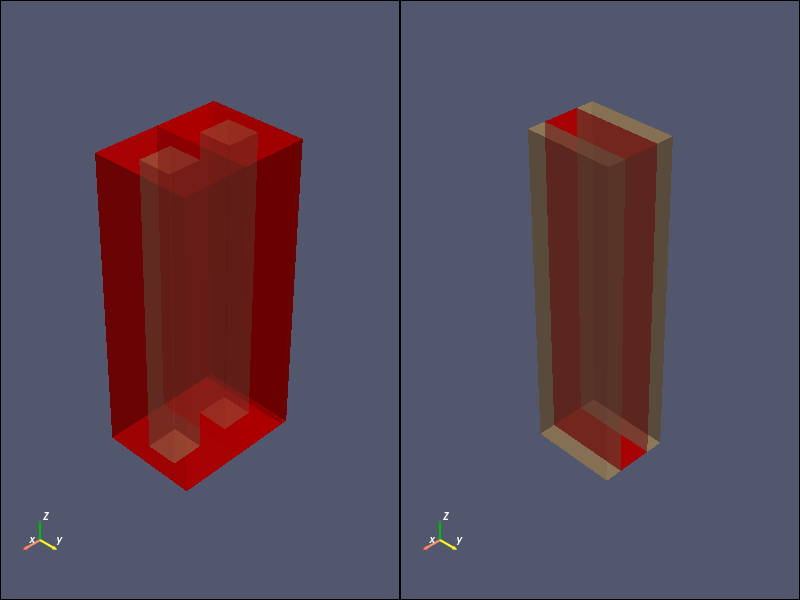

In [19]:
'''Domain'''
import pyvista as pv
def show_domain(screenshot=False):
   
    pv.set_plot_theme('paraview')

    
    #coolant = pv.Cylinder(center=(0,0,0), direction=(0,0,1), height=height, radius=radius_i)
    brick1=pv.Box(bounds=(0.0, 4, 0.0, 6, 0.0, 18.0), level=2, quads=True,)
    air1=pv.Box(bounds=(1, 3, 2, 4, 0.0, 18.0), level=2, quads=True,)
    #air2=pv.Box(bounds=(1, 1.5, 0, 5, 0.0, 18.0), level=0, quads=True,)
    brick2=pv.Box(bounds=(0.4, 8, 0.0, 6, 0.0, 18.0), level=2, quads=True,)
    air2=pv.Box(bounds=(5, 7, 2, 4, 0.0, 18.0), level=2, quads=True,)
    #fir 3D cross-section
    air3=pv.Box(bounds=(0, -1, 0, 5, 0.0, 18.0), level=0, quads=True,)
    brick3=pv.Box(bounds=(0.0, 2, 0.0, 5, 0.0, 18.0), level=2, quads=True,)
    air4=pv.Box(bounds=(2, 3, 0, 5, 0.0, 18.0), level=0, quads=True,)
    plo = pv.Plotter(notebook=True, shape=(1,2))
    plo = pv.Plotter(shape=(1,2)) 
    
    plo.subplot(0,0)
    
    plo.add_mesh(brick1, color='red', opacity=.80)
    #plo.add_mesh(air1, color='tan', opacity=0.99)
    plo.add_mesh(air1, color='tan', opacity=.99)
    plo.add_mesh(brick2, color='red', opacity=.80)
    #plo.add_mesh(air1, color='tan', opacity=0.99)
    plo.add_mesh(air2, color='tan', opacity=.99)
    plo.add_axes(xlabel='x', ylabel='y', zlabel='Z')

    plo.subplot(0,1)
    
    plo.add_mesh(brick3, color='red', opacity=.80)
    #plo.add_mesh(air1, color='tan', opacity=0.99)
    plo.add_mesh(air3, color='tan', opacity=.99)
    #plo.add_mesh(brick2, color='red', opacity=.80)
    #plo.add_mesh(air1, color='tan', opacity=0.99)
    plo.add_mesh(air4, color='tan', opacity=.99)
    plo.add_axes(xlabel='x', ylabel='y', zlabel='Z')
    
    cpos = plo.show(window_size=[800, 600])
    if screenshot:
        plo.screenshot('domain.png')
show_domain()

### [Thermal Conductivity](#toc)<a id="thermal"></a>

\begin{align*}
Q &= -\frac{-k(dT)}{dx} \\
\end{align*}

Thermal conductivity is a material's ability to conduct or transfer heat across an area. It is fundamental in the design, engineering, and application of materials where heat transfer is an important factor. It is used in thermal management, material science, and energy efficiency. The hot air blown into the system causes the FIREBRICKS to cool down unevenly due to thermal conductivity.

\begin{align*}
 k &= 42 \; \left [ \frac{W}{mK} \right ]  \\
\end{align*}

## [Defining Variables](#toc)<a id="vars"></a>

The reference temperature ($u_\text{ref}$ is the ambient temperature of air. To model thermal runaway caused by uneven heating, we are introducing a level of asymmetry to the problem. This can be accomplished by having two different temperatures at the ends of the domain. 

\begin{align*}
 T_{ref,a} &= 20\; [°C] \\
 T_{ref,b} &= 40\; [°C] \\
\end{align*}

We will also define the heat transfer coefficient which is dependent on the speed of the air being channeled through the bricks. The heat transfer coefficient for our problem is as follows: 

\begin{align*}
 h &= 25\; \left [ \frac{W}{m^{2}K} \right ] \\
\end{align*}

### [Heat Power Density](#toc)<a id="heat"></a>

Regarding the heat source, the amount of generated heat can be determined using Joule's Law. The formula is presented in the *Applied Energy* paper as follows:

\begin{align*}
F\left (x \right )=\dot{e}_{gen}=\frac{AV^{2}}{  L_{char} \rho }
\end{align*}

We need, however, a value for the density of the generated heat, which will be obtained by taking the formula presented above and dividing it by a unit of volume, which in this case would be a product of the transversal area and the characteristic length that Stack postulated in his paper. The formula, then, is as follows:

\begin{align*}
f\left (x \right ) = \frac{V^{2}}{  L_{char}^{2} \rho }
\end{align*}

The characteristic length being defined in the same paper as with a value of 5 cm:

\begin{align*}
L_{char} = 0.05 \left [ m \right ]
\end{align*}

The value of rho (electrical resistivity) in the formula is approximated in the same way as we did for that of thermal conductivity. We first oftain the following temperature-dependent formula:

\begin{align*}
\rho (T) &= (8.00E6)\cdot T^{2}-(3.00E10) \cdot T +(2.00E13)\; \left [ \Omega m \right ]  \\
\end{align*}

And one can evaluate the heat generating function with the . There is still the question of which value we should use for the voltage difference, however, and this is something we have absolutely no info on. Daniel Stack doesn't specify a value for the voltage either in his thesis or in the *Applied Energy* paper, and we have no antecedents of the voltage values to be used in this particular application. The value of the voltage being easily changeable, however, we can just introduce values to get some results for the sake of the project, and to have some interesting results to show. For this project, then, the value of the voltage difference in the resistor bricks will be the following:

\begin{align*}
V = 100 \left [ MV \right ]
\end{align*}

And for this, the value of the source at the ends of the domain is as follows:

\begin{align*}
 f_{s}(T_{\text{ref},a}) &= 206,151\; \left [ \frac{W}{m^{3}} \right ]  \\
 f_{s}(T_{\text{ref},b}) &= 212,621\; \left [ \frac{W}{m^{3}} \right ]  \\
\end{align*}

This again we can approximate as a linear position-dependent function, and we obtain:

\begin{align*}
f(x) &= 206,151+129,400 \cdot x \; \left [ \frac{W}{m^{3}} \right ]  \\
\end{align*}

## [Refrences](#toc)<a id="ref"></a> 

- [1] Daniel Stack, [Development of high-temperature firebrick resistance-heated
energy storage (FIRES) using doped ceramic heating syste](https://dspace.mit.edu/bitstream/handle/1721.1/130800/1252204287-MIT.pdf?sequence=1&isAllowed=y)
- [2] James F. Shackleford, [CRC Materials Science and Engineering Handbook](https://www.perlego.com/book/1604331/crc-materials-science-and-engineering-handbook-pdf?campaignid=436439430&adgroupid=1353500607580773&msclkid=6a34f00cf8701419f55b9743a5b1e311)
- [3] E.A. Brandes, G.B. Brooke, [Smithtells Metals Reference Book](https://www.sciencedirect.com/book/9780750675093/smithells-metals-reference-book)
- [4] V. F. de Almeida, [*Engy-5330: Computational Continuum Transport Phenomena*](https://github.com/dpploy/engy-5330), University of Massachusetts Lowell, Dept. of Chemical Engineering (Nuclear Energy Program).
- [5] https://www.crystran.com/optical-materials/magnesium-oxide-mgom